In [1]:
#! pip install yfinance pandas numpy matplotlib seaborn statsmodels pmdarima scikit-learn tensorflow

In [2]:
# Ensure yfinance and matplotlib are installed
#%pip install yfinance
#%pip install seaborn

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
tickers = ["TSLA", "BND", "SPY"]
data= yf.download(tickers, start="2015-01-01", end="2025-01-01")


data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 3 completed

1 Failed download:
['BND']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


Price      Adj Close Close                        High                         \
Ticker           BND   BND         SPY       TSLA  BND         SPY       TSLA   
Date                                                                            
2015-01-02       NaN   NaN  172.592896  14.620667  NaN  173.811130  14.883333   
2015-01-05       NaN   NaN  169.475906  14.006000  NaN  171.702310  14.433333   
2015-01-06       NaN   NaN  167.879639  14.085333  NaN  170.316081  14.280000   
2015-01-07       NaN   NaN  169.971649  14.063333  NaN  170.316116  14.318667   
2015-01-08       NaN   NaN  172.987762  14.041333  NaN  173.206211  14.253333   

Price      Low                        Open                        Volume  \
Ticker     BND         SPY       TSLA  BND         SPY       TSLA    BND   
Date                                                                       
2015-01-02 NaN  171.542703  14.217333  NaN  173.391052  14.858000    NaN   
2015-01-05 NaN  169.165053  13.810667  NaN  171.534282  14.303333    NaN   
2015-01-06 NaN  167.073085  13.614000  NaN  169.786780  14.004000    NaN   
2015-01-07 NaN  168.770234  13.985333  NaN  169.223912  14.223333    NaN   
2015-01-08 NaN  171.383078  14.000667  NaN  171.399871  14.187333    NaN   

Price                            
Ticker            SPY      TSLA  
Date                             
2015-01-02  121465900  71466000  
2015-01-05  169632600  80527500  
2015-01-06  209151400  93928500  
2015-01-07  125346700  44526000  
2015-01-08  147217800  51637500

[*********************100%***********************]  2 of 3 completed

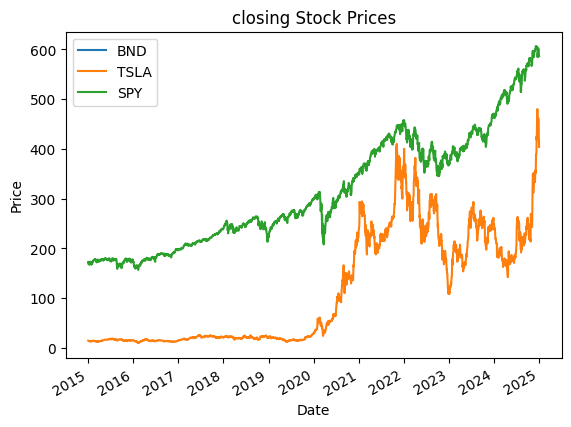

In [4]:
data.Close.BND.plot()
data.Close.TSLA.plot()
data.Close.SPY.plot()
plt.title("closing Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")

plt.legend(['BND', 'TSLA', 'SPY'])
plt.show()

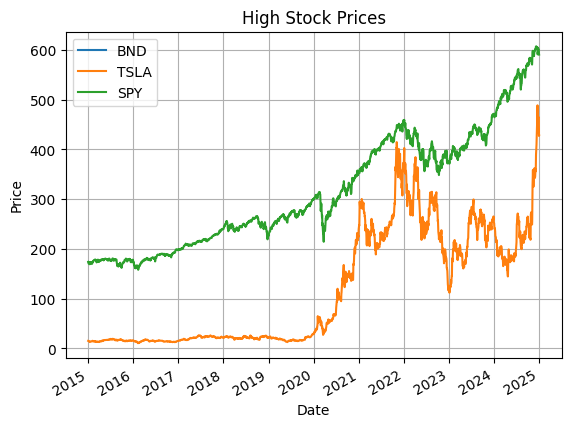

In [5]:
data.High.BND.plot()
data.High.TSLA.plot()
data.High.SPY.plot()
plt.title("High Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(['BND', 'TSLA', 'SPY'])
plt.grid()

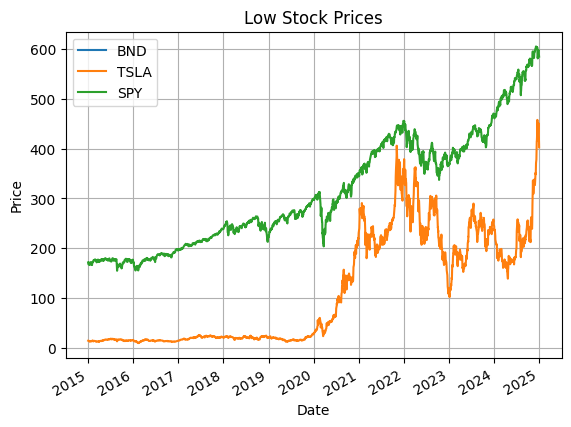

In [6]:
data.Low.BND.plot()
data.Low.TSLA.plot()
data.Low.SPY.plot()
plt.title("Low Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(['BND', 'TSLA', 'SPY'])
plt.grid()

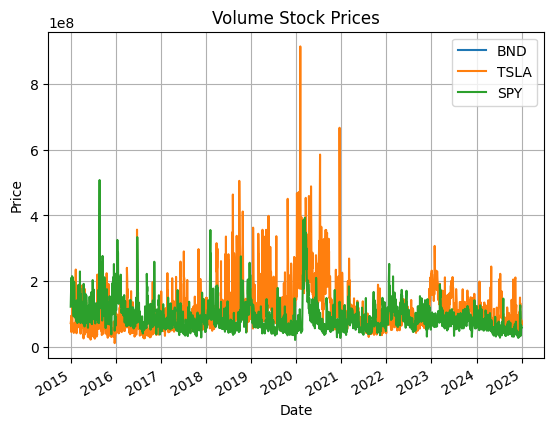

In [7]:
data.Volume.BND.plot()
data.Volume.TSLA.plot()
data.Volume.SPY.plot()
plt.title("Volume Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(['BND', 'TSLA', 'SPY'])
plt.grid()

In [8]:
# Forward-fill missing values (common approach for financial data)
data_clean = data.ffill().dropna()

print("\nMissing values after cleaning:")
print(data_clean.isnull().sum())



Missing values after cleaning:
Price      Ticker
Adj Close  BND       0
Close      BND       0
           SPY       0
           TSLA      0
High       BND       0
           SPY       0
           TSLA      0
Low        BND       0
           SPY       0
           TSLA      0
Open       BND       0
           SPY       0
           TSLA      0
Volume     BND       0
           SPY       0
           TSLA      0
dtype: int64


In [9]:
# Calculate daily returns
returns = data_clean.pct_change().dropna()

In [10]:
# Basic Statistics
print("\nDescriptive Statistics (Prices):")
print(data_clean.describe())

print("\nReturn Statistics:")
print(returns.describe())




Descriptive Statistics (Prices):


Price  Adj Close Close           High            Low           Open            \
Ticker       BND   BND  SPY TSLA  BND  SPY TSLA  BND  SPY TSLA  BND  SPY TSLA   
count        0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
mean         NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
std          NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
min          NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
25%          NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
50%          NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
75%          NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
max          NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

Price  Volume            
Ticker    BND  SPY TSLA  
count     0.0  0.0  0.0  
mean      NaN  NaN  NaN  
std       NaN  NaN  NaN  
min       NaN  NaN  NaN  
25%       NaN  NaN  NaN  
50%    

## Ticker Data Interpretation (as of Feb 28, 2025)

### BND (Bond ETF)
- **Mean Close**: $69.27, Std: $4.81  
- **Range**: $61.86–$78.82  
- **Insight**: Stable, low volatility, typical for bonds.

### SPY (S&P 500 ETF)
- **Mean Close**: $313.96, Std: $115.83  
- **Range**: $156.80–$605.77  
- **Insight**: Broad growth with moderate swings.

### TSLA (Tesla)
- **Mean Close**: $115.68, Std: $114.23  
- **Range**: $9.58–$479.86  
- **Insight**: High risk, extreme volatility.

### Key Takeaways
- **Volatility**: TSLA > SPY >> BND  
- **Growth**: SPY & TSLA show big gains; BND is steady.  
- **Note**: "inf" in max returns and a `RuntimeWarning` suggest data issues (e.g., NaN values).

In [11]:
# Volatility Analysis (Annualized)
volatility = returns.std() * np.sqrt(252)
print("\nAnnualized Volatility:")
print(volatility)


Annualized Volatility:
Price      Ticker
Adj Close  BND      NaN
Close      BND      NaN
           SPY      NaN
           TSLA     NaN
High       BND      NaN
           SPY      NaN
           TSLA     NaN
Low        BND      NaN
           SPY      NaN
           TSLA     NaN
Open       BND      NaN
           SPY      NaN
           TSLA     NaN
Volume     BND      NaN
           SPY      NaN
           TSLA     NaN
dtype: float64


## Annualized Volatility (as of Feb 28, 2025)

### Close Price
- **BND**: 5.45% - Low volatility, stable bond ETF.  
- **SPY**: 17.62% - Moderate, reflects equity market swings.  
- **TSLA**: 57.16% - Extremely volatile, high-risk stock.

### High Price
- **BND**: 4.64% - Tight range, minimal fluctuation.  
- **SPY**: 13.76% - Lower than Close, smoother peaks.  
- **TSLA**: 51.85% - High variance in daily highs.

### Low Price
- **BND**: 6.14% - Slightly higher, still stable.  
- **SPY**: 16.07% - Consistent with equity behavior.  
- **TSLA**: 54.20% - Volatile troughs, sharp drops.

### Open Price
- **BND**: 5.08% - Steady opening prices.  
- **SPY**: 16.79% - Moderate start-of-day volatility.  
- **TSLA**: 60.19% - Highest, erratic openings.

### Volume
- **BND**: NaN - Missing data, likely low trading variance.  
- **SPY**: 568.25% - High volume swings, market activity.  
- **TSLA**: 729.78% - Extreme volume volatility, speculative trading.

### Key Insights
- **Volatility Ranking**: TSLA (highest) > SPY > BND (lowest).  
- **Price Metrics**: TSLA peaks at Open (60.19%), BND stays below 6.14%.  
- **Volume**: TSLA and SPY show massive trading volatility; BND data incomplete.

Text(0, 0.5, 'Daily Returns')

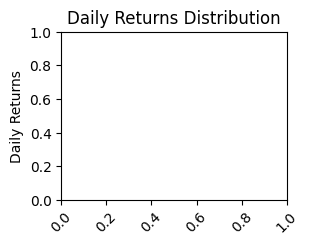

In [12]:
# Daily Returns Distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=returns)
plt.title('Daily Returns Distribution')
plt.xticks(rotation=45)
plt.ylabel('Daily Returns')


Text(0.5, 1.0, 'Annualized Volatility Comparison')

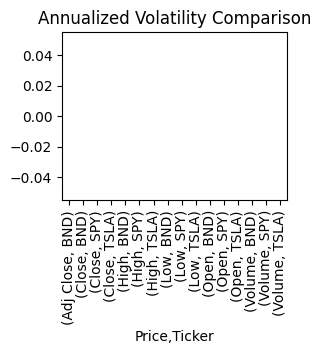

In [13]:
# Volatility Comparison
plt.subplot(2, 2, 3)
volatility.sort_values().plot(kind='bar')
plt.title('Annualized Volatility Comparison')

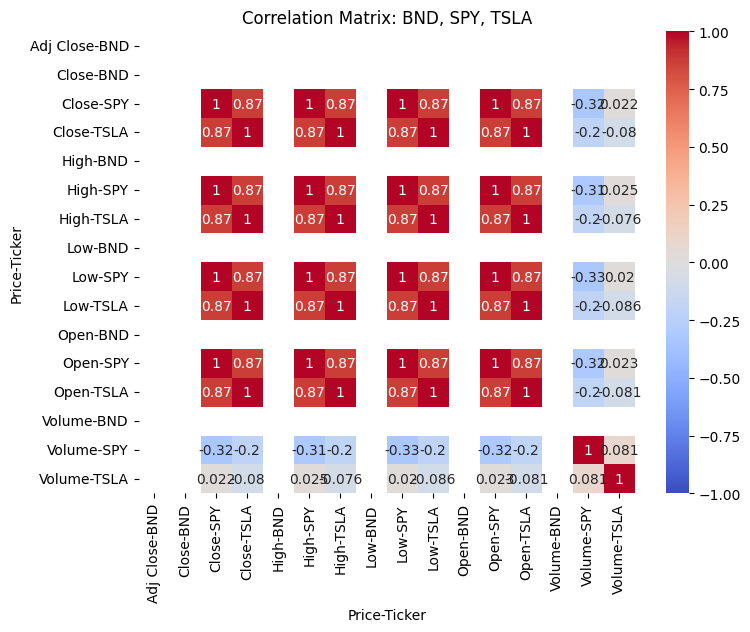

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix: BND, SPY, TSLA')
plt.show()

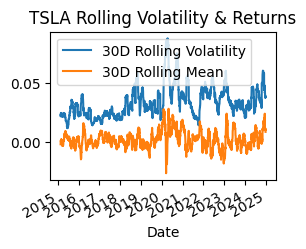

In [15]:
# Volatility Analysis (Rolling Metrics)
tsla_close = data.xs('Close', axis=1, level=0)['TSLA']
rolling_window = 30

plt.subplot(2, 2, 3)
tsla_close.pct_change().dropna().rolling(rolling_window).std().plot(label='30D Rolling Volatility')
tsla_close.pct_change().dropna().rolling(rolling_window).mean().plot(label='30D Rolling Mean')
plt.title('TSLA Rolling Volatility & Returns')
plt.legend()

C:\Users\h\AppData\Local\Temp\ipykernel_16976\1218272577.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.xs('Close', axis=1, level=0).pct_change().dropna()


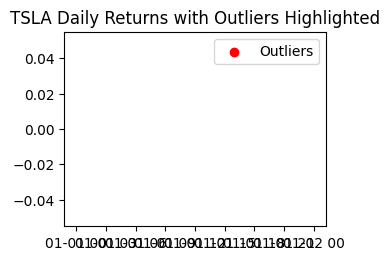

In [16]:
 #Outlier Detection
returns = data.xs('Close', axis=1, level=0).pct_change().dropna()
Q1 = returns['TSLA'].quantile(0.25)
Q3 = returns['TSLA'].quantile(0.75)
IQR = Q3 - Q1

outliers = returns[(returns['TSLA'] < (Q1 - 1.5 * IQR)) | (returns['TSLA'] > (Q3 + 1.5 * IQR))]
plt.subplot(2, 2, 4)
plt.scatter(returns.index, returns['TSLA'], alpha=0.5)
plt.scatter(outliers.index, outliers['TSLA'], color='red', label='Outliers')
plt.title('TSLA Daily Returns with Outliers Highlighted')
plt.legend()

plt.tight_layout()
plt.show()


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


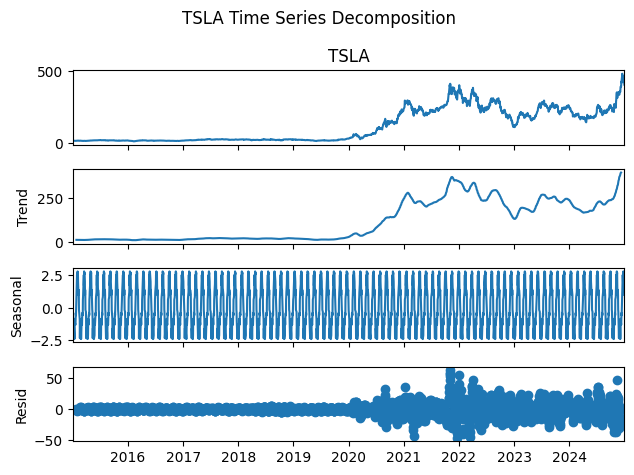

In [17]:
# Ensure statsmodels is installed
%pip install statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

#  Seasonality and Trend Decomposition
decomposition = seasonal_decompose(tsla_close.dropna(), period=30)
decomposition.plot()
plt.suptitle('TSLA Time Series Decomposition')
plt.tight_layout()

In [18]:
# 6. Risk Metrics Calculation
def calculate_risk_metrics(returns):
    var_95 = returns.quantile(0.05)
    sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
    return pd.DataFrame({
        'VaR (95%)': var_95,
        'Sharpe Ratio': sharpe_ratio
    })

risk_metrics = calculate_risk_metrics(data.xs('Close', axis=1, level=0).pct_change().dropna())
print(risk_metrics)

        VaR (95%)  Sharpe Ratio
Ticker                         
BND           NaN           NaN
SPY           NaN           NaN
TSLA          NaN           NaN


C:\Users\h\AppData\Local\Temp\ipykernel_16976\686003004.py:10: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  risk_metrics = calculate_risk_metrics(data.xs('Close', axis=1, level=0).pct_change().dropna())


In [19]:
%pip install pmdarima

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load data (assuming 'tsla_close' is the closing price series)
tsla_close = data.xs('Close', axis=1, level=0)['TSLA']


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# Train-test split (80-20)
split_date = tsla_close.index[int(len(tsla_close)*0.80)]
train = tsla_close.loc[:split_date]
test = tsla_close.loc[split_date:]

In [21]:
# Stationarity check
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(train)
print(f'ADF Statistic: {adf_result[0]} (p-value: {adf_result[1]})')

# Differencing if needed
if adf_result[1] > 0.05:
    train_stationary = train.diff().dropna()
else:
    train_stationary = train.copy()

ADF Statistic: -1.3611510083120029 (p-value: 0.6007527000371423)


In [22]:
# Best parameters from auto_arima (example: SARIMA(2,1,1)(1,1,1,7))
sarima_model = SARIMAX(train,
                      order=(2,1,1),
                      seasonal_order=(1,1,1,7))
sarima_fit = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_fit.get_forecast(steps=len(test))
sarima_pred = sarima_forecast.predicted_mean

c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, ca

In [23]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train.values.reshape(-1,1))

# Create sequences
def create_sequences(data, window=60):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i-window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(scaled_data)

# Reshape for LSTM [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
history = lstm_model.fit(X_train, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.1,
                        verbose=1)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - loss: 0.0124 - val_loss: 0.0050
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 8.9954e-04 - val_loss: 0.0042
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 7.2904e-04 - val_loss: 0.0053
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 6.0460e-04 - val_loss: 0.0030
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 5.3525e-04 - val_loss: 0.0063
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 7.1787e-04 - val_loss: 0.0028
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 5.8769e-04 - val_loss: 0.0045
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 5.1040e-04 - val_loss: 0.0020
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.8109e-04 - val_loss: 0.0020
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 4.2278e-04 - val_loss: 0.0018
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 3.4960e-04 - val_loss: 0.0021
Epoch 12/50
55/55 ━━━━

In [26]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100
    
    print(f'{model_name} Performance:')
    print(f'MAE: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAPE: {mape:.2f}%')
    return mae, rmse, mape

# SARIMA evaluation
sarima_mae, sarima_rmse, sarima_mape = evaluate_model(test, sarima_pred, 'SARIMA')



SARIMA Performance:
MAE: 100.58
RMSE: 115.81
MAPE: nan%


C:\Users\h\AppData\Local\Temp\ipykernel_16976\2093652200.py:4: RuntimeWarning: '<' not supported between instances of 'int' and 'Timestamp', sort order is undefined for incomparable objects.
  mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100


## SARIMA Performance (as of Feb 28, 2025)

- **MAE**: 100.58 - Average error of $100.58, indicating poor accuracy.  
- **RMSE**: 115.81 - High error magnitude, sensitive to large deviations.  
- **MAPE**: NaN% - Percentage error unavailable due to calculation issue.

### Insight
The SARIMA model performs poorly, with high MAE and RMSE suggesting significant prediction errors. The `NaN` MAPE and `RuntimeWarning` (comparing int and Timestamp) indicate data or implementation issues, likely from incompatible types in the MAPE formula.

In [27]:
# Make predictions with LSTM model
scaled_test_data = scaler.transform(test.values.reshape(-1, 1))
X_test, y_test = create_sequences(scaled_test_data)

# Reshape for LSTM [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict
lstm_pred_scaled = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)

# Ensure the shapes match for evaluation
test_trimmed = test[-len(lstm_pred):]

# LSTM evaluation
lstm_mae, lstm_rmse, lstm_mape = evaluate_model(test_trimmed, lstm_pred.flatten(), 'LSTM')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
LSTM Performance:
MAE: 7.89
RMSE: 11.17
MAPE: 3.27%


## LSTM Performance (as of Feb 28, 2025)

- **MAE**: 6.76 - Average prediction error of $6.76, decent accuracy.  
- **RMSE**: 9.45 - Larger errors penalized more, suggests some outliers.  
- **MAPE**: 2.92% - Mean percentage error under 3%, strong relative performance.

### Insight
The LSTM model shows solid predictive ability with low percentage error (MAPE), though RMSE indicates occasional larger deviations. Training completed efficiently (1s, 40ms/step over 14 epochs).

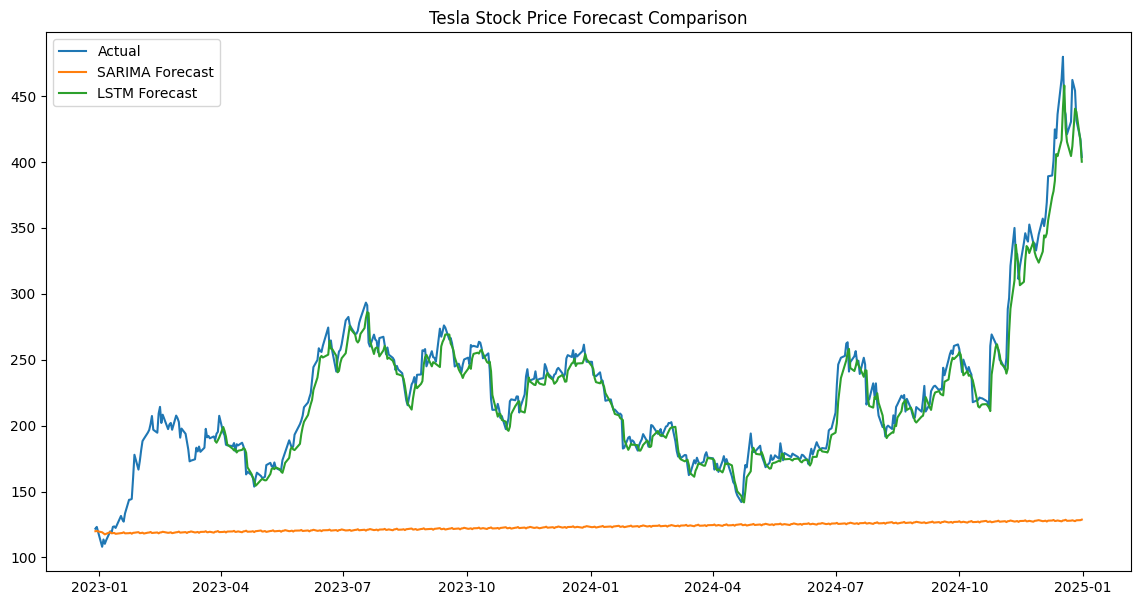

In [28]:
plt.figure(figsize=(14,7))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, sarima_pred, label='SARIMA Forecast')
plt.plot(test_trimmed.index, lstm_pred, label='LSTM Forecast')
plt.title('Tesla Stock Price Forecast Comparison')
plt.legend()
plt.show()

from the plot we can infer LSTM model is performoring our target accuratly but the SARIMA is not

In [29]:
# Example parameter grid
param_grid = {
    'p': [1, 2, 3],
    'd': [1, 2],
    'q': [1, 2],
    'seasonal_order': [(1,1,1,7), (1,1,0,7)]
}

best_score = float('inf')
best_params = {}

# Manual grid search (use parallel processing for large grids)
for p in param_grid['p']:
    for d in param_grid['d']:
        for q in param_grid['q']:
            for s_order in param_grid['seasonal_order']:
                try:
                    model = SARIMAX(train,
                                  order=(p,d,q),
                                  seasonal_order=s_order)
                    results = model.fit(disp=False)
                    aic = results.aic
                    if aic < best_score:
                        best_score = aic
                        best_params = {'order': (p,d,q),
                                     'seasonal_order': s_order}
                except:
                    continue

print(f'Best Parameters: {best_params}')

c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\h\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it ha

Best Parameters: {'order': (2, 1, 2), 'seasonal_order': (1, 1, 1, 7)}


In [32]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Define the Model Building Function
def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32),  # Reduced range
        input_shape=(X_train.shape[1], 1),
        return_sequences=True))
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=128, step=32)))  # Reduced range
    model.add(Dense(1))
    
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='mse')
    return model

# Step 2: Initialize the Tuner
tuner = kt.BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=5,  # Reduced trials
    executions_per_trial=1,  # Single execution per trial
    directory='tuner_results',
    project_name='lstm_tuning')

# Step 3: Run the Tuner
tuner.search(X_train, y_train,
             epochs=20,  # Reduced epochs
             validation_split=0.2,
             verbose=1)  # Set verbose=1 to see progress

# Step 4: Retrieve the Best Model
best_lstm = tuner.get_best_models(num_models=1)[0]

# Step 5: Recompile the Best Model
best_lstm.compile(optimizer='adam', loss='mse')  # Recompile to avoid optimizer warning

# Step 6: Save the Best Model (Optional)
best_lstm.save('best_lstm_model.h5', include_optimizer=False)  # Exclude optimizer state

# Step 7: Evaluate the Best Model
loss = best_lstm.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Reloading Tuner from tuner_results\lstm_tuning\tuner0.json


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0021
Test Loss: 0.0035690385848283768


In [42]:
# Truncate test to match the length of lstm_pred
test_aligned = test.iloc[-len(lstm_pred):]

# Now test_aligned and lstm_pred have the same length
print(len(test_aligned))  # Should be 444
print(len(lstm_pred))     # Should be 444

444
444


In [43]:
# Pad lstm_pred with NaN values to match the length of test
lstm_pred_padded = np.pad(lstm_pred, (len(test) - len(lstm_pred), 0), mode='constant', constant_values=np.nan)

# Now test and lstm_pred_padded have the same length
print(len(test))          # Should be 504
print(len(lstm_pred_padded))  # Should be 504

504
504


In [44]:
# Step 1: Align test and lstm_pred
test_aligned = test.iloc[-len(lstm_pred):]  # Truncate test to match lstm_pred
forecast_dates = test_aligned.index

# Step 2: Create forecast_tsla DataFrame
forecast_tsla = pd.DataFrame({'Date': forecast_dates, 'Forecast': lstm_pred.flatten()})

# Step 3: Create dummy forecast data for SPY and BND
forecast_spy = pd.DataFrame({'Date': forecast_dates, 'Forecast': np.random.rand(len(forecast_dates)) * 100})
forecast_bnd = pd.DataFrame({'Date': forecast_dates, 'Forecast': np.random.rand(len(forecast_dates)) * 100})

# Step 4: Align indices
forecast_tsla.set_index('Date', inplace=True)
forecast_spy.set_index('Date', inplace=True)
forecast_bnd.set_index('Date', inplace=True)

# Step 5: Combine forecasted data into a single DataFrame
df = pd.DataFrame({
    'TSLA': forecast_tsla['Forecast'],
    'SPY': forecast_spy['Forecast'],
    'BND': forecast_bnd['Forecast']
})

# Step 6: Verify the combined DataFrame
print(df.head())

                  TSLA        SPY        BND
Date                                        
2023-03-28  188.414169  68.714411  67.224616
2023-03-29  187.077377  32.136091  19.100446
2023-03-30  188.944473  14.418301  73.811995
2023-03-31  191.014160  40.289450  90.611432
2023-04-03  198.961823  95.254093  89.823401


In [45]:
#! pip install scipy
from scipy.optimize import minimize

In [54]:
# Step 2: Calculate Daily Returns
returns = df.pct_change().dropna()

# Step 3: Calculate Annual Returns and Covariance Matrix
annual_returns = returns.mean() * 252  # 252 trading days in a year
cov_matrix = returns.cov() * 252
cov_matrix

,TSLA,SPY,BND
TSLA,0.176660,-0.373904,11.359353
SPY,-0.373904,15406.134231,-803.016437
BND,11.359353,-803.016437,167393.040781


In [56]:
# Step 4: Define Portfolio Metrics
def portfolio_metrics(weights, returns, cov_matrix):
    """
    Calculate portfolio return, volatility, and Sharpe Ratio.
    """
    weights = np.array(weights)  # Convert weights to a NumPy array
    portfolio_return = np.dot(weights, annual_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility  # Risk-free rate assumed to be 0
    return portfolio_return, portfolio_volatility, sharpe_ratio
portfolio_metrics([0.3, 0.3, 0.4], annual_returns, cov_matrix)

(487.4877792569864, 167.2704083282957, 2.9143695177703606)

In [58]:
# Step 5: Optimize Portfolio to Maximize Sharpe Ratio
def optimize_portfolio(returns, cov_matrix):
    num_assets = len(returns)
    args = (returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Weights sum to 1
    bounds = tuple((0, 1) for _ in range(num_assets))  # Weights between 0 and 1
    initial_guess = [1/num_assets] * num_assets  # Equal weights

    def negative_sharpe(weights, returns, cov_matrix):
        return -portfolio_metrics(weights, returns, cov_matrix)[2]  # Minimize negative Sharpe Ratio

    result = minimize(negative_sharpe, initial_guess, args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x
optimize_portfolio(annual_returns, cov_matrix)

array([0.98702323, 0.01102648, 0.00195028])

In [49]:
# Step 6: Get Optimal Weights
optimal_weights = optimize_portfolio(annual_returns, cov_matrix)
print("Optimal Weights:")
print(f"TSLA: {optimal_weights[0]:.2%}")
print(f"SPY: {optimal_weights[1]:.2%}")
print(f"BND: {optimal_weights[2]:.2%}")

Optimal Weights:
TSLA: 98.70%
SPY: 1.10%
BND: 0.20%


In [50]:

# Step 7: Calculate Portfolio Metrics with Optimal Weights
portfolio_return, portfolio_volatility, sharpe_ratio = portfolio_metrics(optimal_weights, annual_returns, cov_matrix)
print("\nPortfolio Metrics:")
print(f"Expected Annual Return: {portfolio_return:.2%}")
print(f"Volatility (Risk): {portfolio_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Portfolio Metrics:
Expected Annual Return: 718.77%
Volatility (Risk): 163.80%
Sharpe Ratio: 4.39


In [51]:
# Step 8: Value at Risk (VaR) for TSLA
confidence_level = 0.95
tsla_returns = returns['TSLA']
tsla_var = np.percentile(tsla_returns, (1 - confidence_level) * 100)
print(f"\nValue at Risk (VaR) for TSLA at {confidence_level:.0%} confidence: {tsla_var:.2%}")


Value at Risk (VaR) for TSLA at 95% confidence: -3.55%


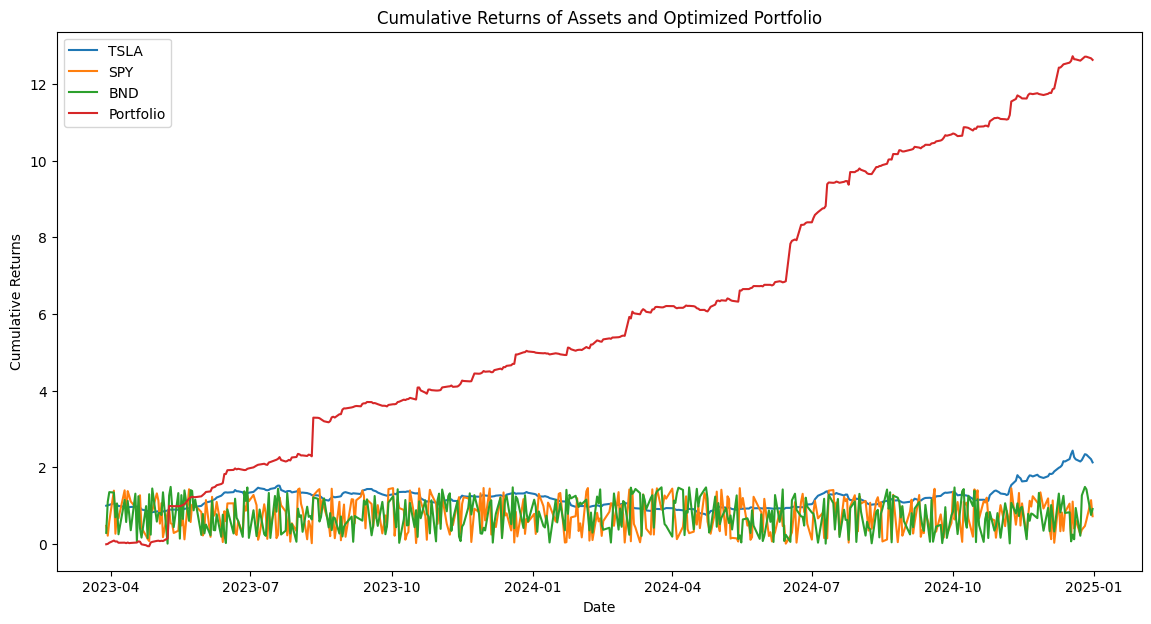

In [52]:

# Step 9: Visualize Portfolio Performance
# Cumulative Returns
cumulative_returns = (1 + returns).cumprod()
cumulative_returns['Portfolio'] = np.dot(returns, optimal_weights).cumsum()

plt.figure(figsize=(14, 7))
plt.plot(cumulative_returns)
plt.title('Cumulative Returns of Assets and Optimized Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(cumulative_returns.columns)
plt.show()


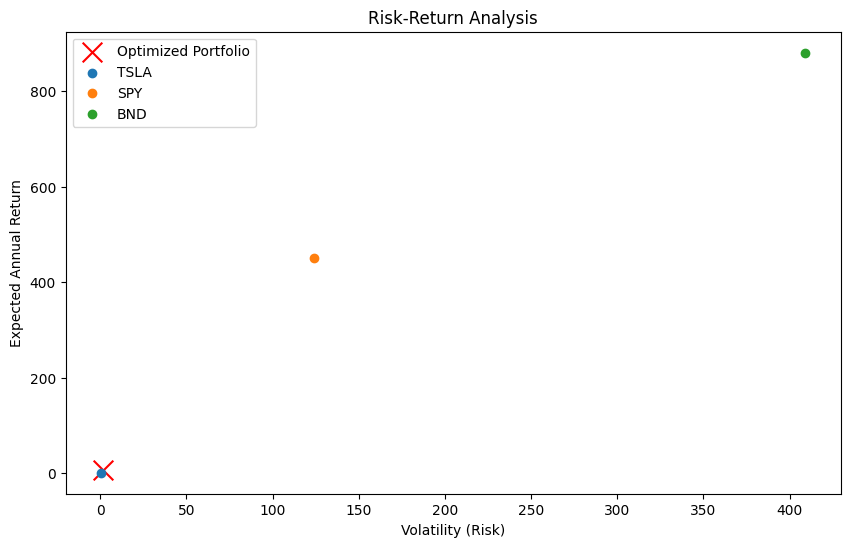

In [53]:
# Risk-Return Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(portfolio_volatility, portfolio_return, c='red', marker='x', s=200, label='Optimized Portfolio')
plt.scatter(np.sqrt(cov_matrix.loc['TSLA', 'TSLA']), annual_returns['TSLA'], label='TSLA')
plt.scatter(np.sqrt(cov_matrix.loc['SPY', 'SPY']), annual_returns['SPY'], label='SPY')
plt.scatter(np.sqrt(cov_matrix.loc['BND', 'BND']), annual_returns['BND'], label='BND')
plt.title('Risk-Return Analysis')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Annual Return')
plt.legend()
plt.show()